# Part One

#### 1. What is the difference between SparkContext and SparkSession?

Prior to Apache Spark 2.0, SparkContext was the entry point for access and functionality of the API. A SparkContext runs on master node, represents the connection to a Spark cluster, and can be used to create RDDs, accumulators and broadcast variables on that cluster. If using SparkContext, it was necessary to create separate contexts to use other APIs (i.e. SQL, HIVE, and Streaming).

After Apache Spark 2.0, SparkSession is the entry point to use the Dataset and DataFrame APIs. SparkSession internally has a SparkContext for computation. With SparkSession, there is no need to create separate contexts to use the other APIs (i.e. SQL, HIVE, and Streaming) because they are included in/with SparkSession.

__[Reference 1](https://spark.apache.org/docs/2.3.0/api/java/org/apache/spark/SparkContext.html)__
__[Reference 2](https://spark.apache.org/docs/2.3.0/api/java/org/apache/spark/sql/SparkSession.html)__
__[Reference 3](http://www.eli.sdsu.edu/courses/spring19/cs696/notes/D13SparkIntro.pdf)__

#### 2. Explain the shuffle operation in Spark operations. Give an example.

The shuffle operation in Spark operations is the process of moving the data from partition to partition in order to aggregate, join, match up, or spread out in some other way. Additionally, a map-side shuffle is the aggregation/reduction that takes place before data is moved across partitions.

The following operations are examples of shuffle inducing operations for RDDs (Resilient Distributed Dataset):

- groupBy/subtractByKey/foldByKey/aggregateByKey/reduceByKey
- cogroup
- any of the join transformations
- distinct

A specific example would be:

rdd.flatMap { line => line.split(' ') }.map((_ , 1)).reduceByKey((a, b) => a + b).collect()

__[Reference](http://hydronitrogen.com/apache-spark-shuffles-explained-in-depth.html)__

#### 3. What is the difference between a Spark transformation and a Spark action?

Transformations:

- Done on worker machines
- Lazy

Actions:

- Bring results to master machine
- Trigger transformations

A transformation (e.g. filter, union, etc.) changes RDD data, whereas an action (e.g. count, first, etc.) gives an output and does not change RDD data.

__[Reference](http://www.eli.sdsu.edu/courses/spring19/cs696/notes/D14SparkIntro2.pdf)__

### 4. Cleaning Data

#### a. What operations do we have on Panda DataFrames to deal with missing values?

In Panda DataFrames missing values are either None or NaN (Not a Number). Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. Methods for detecting, removing, and replacing null values in Pandas data structures include:

- isnull(): Generate a boolean mask indicating missing values
- notnull(): Opposite of isnull()
- dropna(): Return a filtered version of the data
- fillna(): Return a copy of the data with missing values filled or imputed
- interpolate(): Performs interpolation at missing data points

#### b. What are some of the problems that occur in dealing with missing values in Panda DataFrames?

Some of the problems that occur in dealing with missing values in Panda DataFrames are:

- Any operation that involves a NaN value will result in NaN
- Using dropna() will drop full rows or full columns, which drops some good data as well
- Using fillna() replaces the NaN value(s) with a specified value(s), which are arbitrary and not necessarily valid
- Using interpolate() uses interpolation to replace the NaN value(s) with an interpolated value, which, again, are arbitrary and not necessarily valid

#### c. What operations do we have on Spark DataFrames to deal with missing values?

The operations we have on Spark DataFrames to deal with missing values include:

- drop() will remove all the rows that have missing (null or NaN) values
- fill() will replace null or NaN values in numeric columns with a specified value
- replace() will replace values matching keys in replacement map with the corresponding values (Scala and Java specific?)

__[Reference 1](http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)__
__[Reference 2](https://spark.apache.org/docs/2.2.0/api/java/org/apache/spark/sql/DataFrameNaFunctions.html)__

### 5. What is a categorical variable? Give an example.

A categorical variable is a variable which takes on values that are names or labels, i.e. data which may be divided into a finite number of categories or distinct groups. Examples of categorical variables are dog breed, race, sex, etc.

__[Reference 1](http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm)__

### 6. What are hyperparameters? Give an example.

A (model) hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data. Examples of hyperparameters include the learning rate at which a model is trained, the k in k-nearest neighbors, etc.

__[Reference 1](https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models)__

In [1]:
# CSV files
ALL_ATHLETES_CSV_FILE = '/Users/whitney/Courses/696/Spring19/exams/696Exam/ALL-ATHLETES.csv'
MOVIES_CSV_FILE = '/Users/whitney/Courses/696/Spring19/exams/696Exam/movies.csv'

In [2]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, precision_score, recall_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from IPython.display import display, HTML
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
import warnings
warnings.filterwarnings('ignore')

# Part Two

This part uses the athlete data set in the file ALL-ATHLETES.csv. This dataset contains information about athletes that participated in the London 2012 Olympics.

### 1. The data requires some cleaning. Make sure that you clean the data before working on the rest of the problems. All solutions should start with the original dataset.

In [3]:
# Load athlete data
athletes_df = pd.read_csv(ALL_ATHLETES_CSV_FILE)
# Rename the columns
athletes_df = athletes_df.rename(columns = {'Name':'NAME', 'Country':'COUNTRY', 'Age':'AGE', 'Height, cm':'HEIGHT', 'Weight':'WEIGHT', 'Sex':'SEX', 
                                            'Date of birth':'DATE_OF_BIRTH', 'Place of birth':'PLACE_OF_BIRTH', 'Gold':'GOLD', 'Silver':'SILVER', 
                                            'Bronze':'BRONZE', 'Total':'TOTAL', 'Sport':'SPORT', 'Event':'EVENT'})
athletes_df.head()

,NAME,COUNTRY,AGE,HEIGHT,WEIGHT,SEX,DATE_OF_BIRTH,PLACE_OF_BIRTH,GOLD,SILVER,BRONZE,TOTAL,SPORT,EVENT
0,Lamusi A,People's Republic of China,23,170.0,60.0,M,6/2/1989,NEIMONGGOL (CHN),0,0,0,0,Judo,Men's -60kg
1,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Sheldon (USA),0,0,0,0,Athletics,Men's Hammer Throw
2,Jamale Aarrass,France,30,187.0,76.0,M,11/15/1981,BEZONS (FRA),0,0,0,0,Athletics,Men's 1500m
3,Abdelhak Aatakni,Morocco,24,NaN,NaN,M,2/9/1988,AIN SEBAA (MAR),0,0,0,0,Boxing,Men's Light Welter (64kg)
4,Maria Abakumova,Russian Federation,26,178.0,85.0,F,1/15/1986,STAVROPOL REGION (RUS),0,0,0,0,Athletics,Women's Javelin Throw


In [4]:
# Drop the 'PLACE_OF_BIRTH' column
athletes_df.drop('PLACE_OF_BIRTH', inplace=True, axis=1)
athletes_df.head()

,NAME,COUNTRY,AGE,HEIGHT,WEIGHT,SEX,DATE_OF_BIRTH,GOLD,SILVER,BRONZE,TOTAL,SPORT,EVENT
0,Lamusi A,People's Republic of China,23,170.0,60.0,M,6/2/1989,0,0,0,0,Judo,Men's -60kg
1,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,0,0,0,0,Athletics,Men's Hammer Throw
2,Jamale Aarrass,France,30,187.0,76.0,M,11/15/1981,0,0,0,0,Athletics,Men's 1500m
3,Abdelhak Aatakni,Morocco,24,NaN,NaN,M,2/9/1988,0,0,0,0,Boxing,Men's Light Welter (64kg)
4,Maria Abakumova,Russian Federation,26,178.0,85.0,F,1/15/1986,0,0,0,0,Athletics,Women's Javelin Throw


In [5]:
# Fill the missing rows in 'HEIGHT' and 'WEIGHT' using interpolation
athletes_df = athletes_df.interpolate()
athletes_df.head()

,NAME,COUNTRY,AGE,HEIGHT,WEIGHT,SEX,DATE_OF_BIRTH,GOLD,SILVER,BRONZE,TOTAL,SPORT,EVENT
0,Lamusi A,People's Republic of China,23,170.0,60.0,M,6/2/1989,0,0,0,0,Judo,Men's -60kg
1,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,0,0,0,0,Athletics,Men's Hammer Throw
2,Jamale Aarrass,France,30,187.0,76.0,M,11/15/1981,0,0,0,0,Athletics,Men's 1500m
3,Abdelhak Aatakni,Morocco,24,182.5,80.5,M,2/9/1988,0,0,0,0,Boxing,Men's Light Welter (64kg)
4,Maria Abakumova,Russian Federation,26,178.0,85.0,F,1/15/1986,0,0,0,0,Athletics,Women's Javelin Throw


In [6]:
print(athletes_df.isnull().any())

NAME             False
COUNTRY          False
AGE              False
HEIGHT           False
WEIGHT           False
SEX              False
DATE_OF_BIRTH    False
GOLD             False
SILVER           False
BRONZE           False
TOTAL            False
SPORT            False
EVENT            False
dtype: bool


In [7]:
print(athletes_df.isnull().sum())

NAME             0
COUNTRY          0
AGE              0
HEIGHT           0
WEIGHT           0
SEX              0
DATE_OF_BIRTH    0
GOLD             0
SILVER           0
BRONZE           0
TOTAL            0
SPORT            0
EVENT            0
dtype: int64


### 2. Produce a scatter plot of the athletes weight versus height.

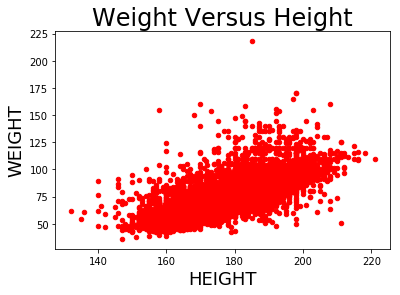

In [8]:
# y = weight, x = height
athletes_df.plot.scatter(x='HEIGHT', y='WEIGHT',color='red')
plt.title('Weight Versus Height')
plt.show()

### 3. Produce box plots of the following. How do the weights compare?

#### a. Female weights

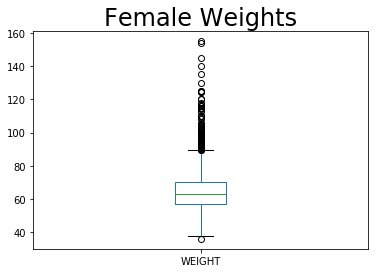

In [9]:
female_athletes_df = athletes_df.loc[athletes_df['SEX'].isin(['F'])]
female_athletes_weight_stats = female_athletes_df['WEIGHT'].describe()
female_athletes_df.boxplot(column=['WEIGHT'], grid=False)
plt.title('Female Weights')
plt.show()

#### b. Male weights

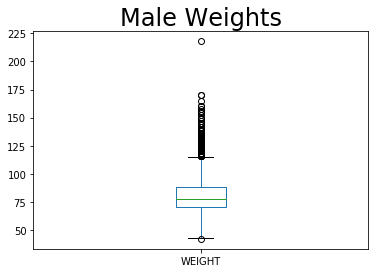

In [10]:
male_athletes_df = athletes_df.loc[athletes_df['SEX'].isin(['M'])]
male_athletes_weight_stats = male_athletes_df['WEIGHT'].describe()
male_athletes_df.boxplot(column=['WEIGHT'], grid=False)
plt.title('Male Weights')
plt.show()

#### c. Weight of the male medal winners

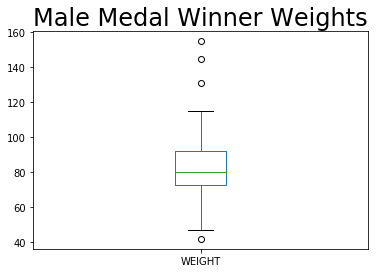

In [11]:
male_athletes_medalist_df = male_athletes_df.loc[(male_athletes_df['GOLD'] > 0) | (male_athletes_df['SILVER'] > 0) | (male_athletes_df['BRONZE'] > 0)]
male_athletes_medalist_weight_stats = male_athletes_medalist_df['WEIGHT'].describe()
male_athletes_medalist_df.boxplot(column=['WEIGHT'], grid=False)
plt.title('Male Medal Winner Weights')
plt.show()

#### d. Weight of the female medal winners

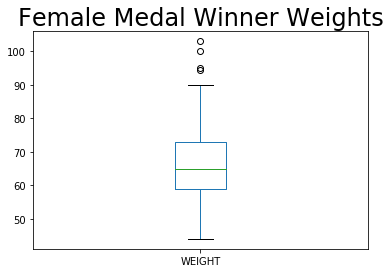

In [12]:
female_athletes_medalist_df = female_athletes_df.loc[(female_athletes_df['GOLD'] > 0) | (female_athletes_df['SILVER'] > 0) | (female_athletes_df['BRONZE'] > 0)]
female_athletes_medalist_weight_stats = female_athletes_medalist_df['WEIGHT'].describe()
female_athletes_medalist_df.boxplot(column=['WEIGHT'], grid=False)
plt.title('Female Medal Winner Weights')
plt.show()

In [13]:
weight_stats = {'Female Athletes Weight Stats': female_athletes_weight_stats, 'Male Athletes Weight Stats': male_athletes_weight_stats, 'Male Athletes Medalist Weight Stats': male_athletes_medalist_weight_stats, 'Female Athletes Medalist Weight Stats': female_athletes_medalist_weight_stats}
weight_stats_df = pd.DataFrame.from_dict(weight_stats, orient='index', columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
print(weight_stats_df)

print('\n')

print("The median for female athletes is: " + np.str(female_athletes_df['WEIGHT'].median()))
print("The median for male athletes is: " + np.str(male_athletes_df['WEIGHT'].median()))
print("The median for male athlete medalist is: " + np.str(male_athletes_medalist_df['WEIGHT'].median()))
print("The median for female athlete medalist is: " + np.str(female_athletes_medalist_df['WEIGHT'].median()))

                                        count       mean        std   min  \
Female Athletes Medalist Weight Stats   233.0  65.843348  10.390860  44.0   
Female Athletes Weight Stats           4628.0  64.353382  11.339998  36.0   
Male Athletes Medalist Weight Stats     260.0  81.470705  14.571533  42.0   
Male Athletes Weight Stats             5756.0  79.693893  15.178670  42.0   

                                        25%        50%   75%    max  
Female Athletes Medalist Weight Stats  59.0  65.000000  73.0  103.0  
Female Athletes Weight Stats           57.0  63.000000  70.0  155.0  
Male Athletes Medalist Weight Stats    73.0  80.500000  92.0  155.0  
Male Athletes Weight Stats             70.0  77.366667  88.0  218.0  


The median for female athletes is: 63.0
The median for male athletes is: 77.36666666666667
The median for male athlete medalist is: 80.5
The median for female athlete medalist is: 65.0


#### How do the weights compare?

- Outliers:
  - The medal winners (male and female) have fewer outliers than the combined (male and female containing medalist and non-medalist).

- Excluding the Outliers:
  - The means are very close, with the medal winners (male and female) having a slightly higher mean weight than the combined (male and female containing medalist and non-medalist).
  - The median of the medal winners (male and female) are higher than the combined (male and female containing medalist and non-medalist).
    - For all, the mean and median are not the same, which means the data is not symmetrical and is skewed in some way.
      - From the box plots, all the groups seem slightly skewed to the right.
  - The standard deviation of the medal winners (male and female) are smaller than the combined (male and female containing medalist and non-medalist), which means the weights are closer to the average.

### 4. Produce separate swarm plots of the ages of male medal winners and the female medal winners. How do the ages compare?

#### Swarm plot of the ages of male medal winners

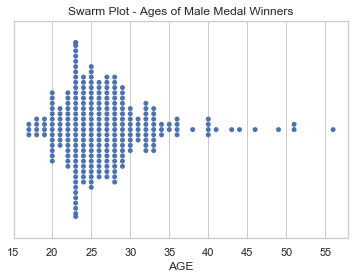

In [14]:
sns.set(style='whitegrid')
ages_male_medalist = sns.swarmplot(male_athletes_medalist_df['AGE'])
plt.title('Swarm Plot - Ages of Male Medal Winners')
plt.show(ages_male_medalist)

#### Swarm plot of the ages of female medal winners

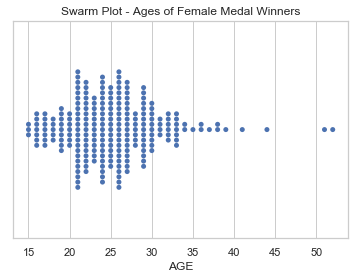

In [15]:
sns.set(style='whitegrid')
ages_female_medalist = sns.swarmplot(female_athletes_medalist_df['AGE'])
plt.title('Swarm Plot - Ages of Female Medal Winners')
plt.show(ages_female_medalist)

#### How do the ages compare?

- There are more female medal winners under the age of 20 than there are male medal winners under the age of 20.
- The majority of medal winners, both male and female, are 20 to 30 years old.
- The distribution of male medal winners appears skewed to the right, wheres the distribution of female medal winners appears more normal/symmetric.
- There are more male winners over the age of 30 than there are female medal winners over the age of 30.

### 5. Produce separate violin plots for the ages of the athletes in Archery, Sailing, and Swimming. How do the ages compare?

#### Violin plot for the ages of the athletes in Archery

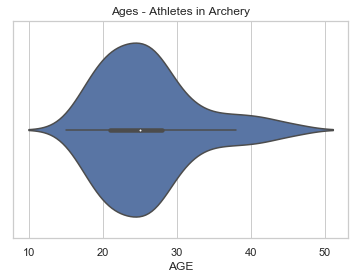

In [16]:
sns.set(style='whitegrid')
athletes_archery_df = athletes_df.loc[athletes_df['SPORT'].isin(['Archery'])]
ages_athletes_archery = sns.violinplot(athletes_archery_df['AGE'])
plt.title('Ages - Athletes in Archery')
plt.show(ages_athletes_archery)

#### Violin plot for the ages of the athletes in Sailing

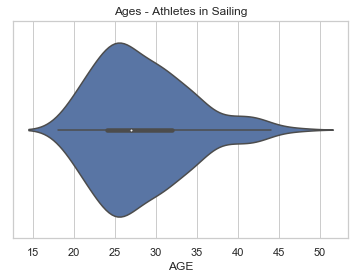

In [17]:
sns.set(style='whitegrid')
athletes_sailing_df = athletes_df.loc[athletes_df['SPORT'].isin(['Sailing'])]
ages_athletes_sailing = sns.violinplot(athletes_sailing_df['AGE'])
plt.title('Ages - Athletes in Sailing')
plt.show(ages_athletes_sailing)

#### Violin plot for the ages of the athletes in Swimming

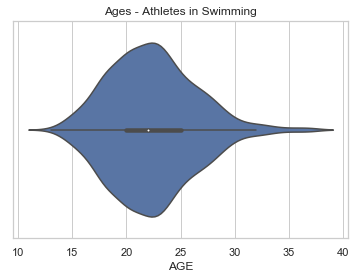

In [18]:
sns.set(style='whitegrid')
athletes_swimming_df = athletes_df.loc[athletes_df['SPORT'].isin(['Swimming'])]
ages_athletes_swimming = sns.violinplot(athletes_swimming_df['AGE'])
plt.title('Ages - Athletes in Swimming')
plt.show(ages_athletes_swimming)

#### How do the ages compare?

- Athletes in Swimming have a higher probability of being younger (20 years old to 25 years old) than athletes in Archery and-or Sailing.
- Athletes in Archery and Sailing have a high probability of being (approximately) 25 years old.
- Athletes in Archery and Sailing have a higher probability of being older (over 30 years old) than athletes in Swimming.
- The distribution of the ages of the athletes in Archery is skewed to the left.
- The distribution of the ages of the athletes in Sailing and Swimming is skewed to the right.

### 6. Produce a histogram of the medals won per country, sorted by the number of medals won.

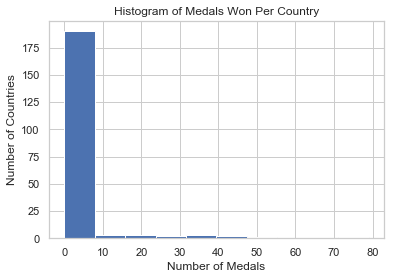

In [19]:
medals_per_country = athletes_df.groupby(['COUNTRY'])[['TOTAL']].sum()
medals_per_country = medals_per_country.sort_values('TOTAL')
medals_per_country_hist = medals_per_country['TOTAL'].hist()
plt.title('Histogram of Medals Won Per Country')
plt.xlabel('Number of Medals')
plt.ylabel('Number of Countries')
plt.show(medals_per_country_hist)

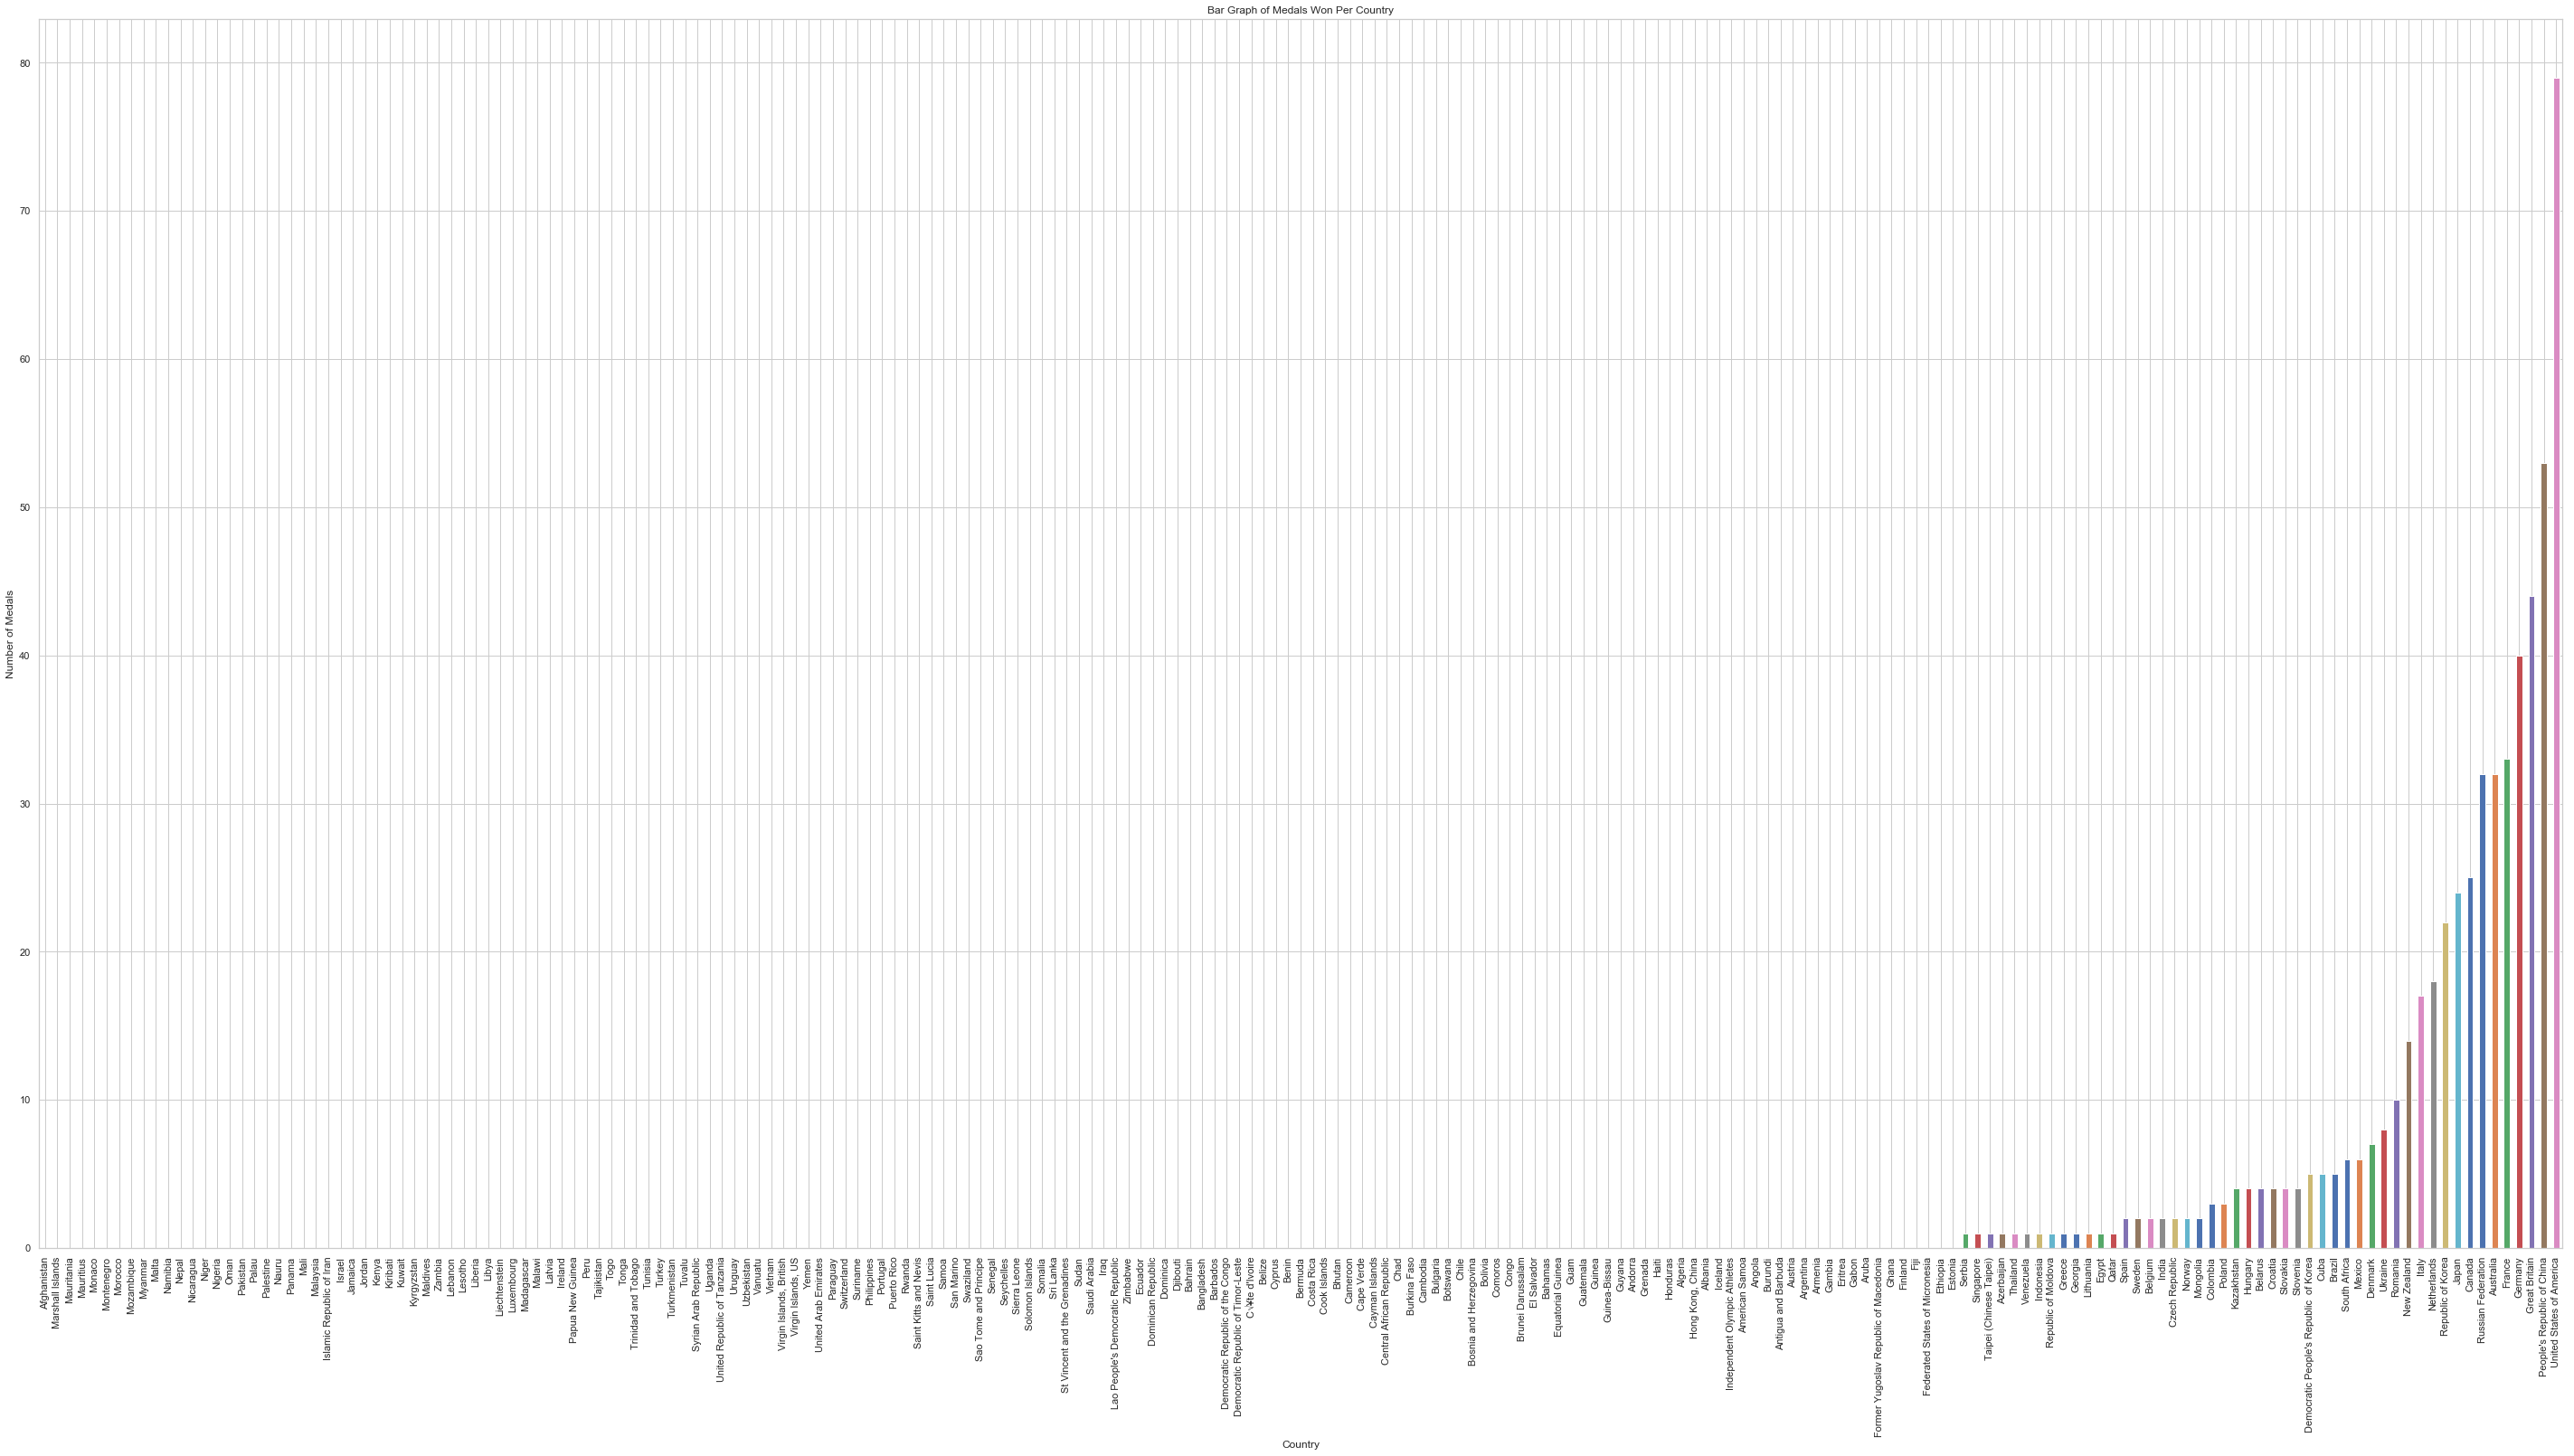

In [20]:
medals_per_country_bar = medals_per_country['TOTAL'].plot(kind='bar', figsize=[50,25])
plt.title('Bar Graph of Medals Won Per Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show(medals_per_country_bar)

# Part Three

This part uses the movie dataset in the movies.csv file. The data set classifies the movies as either a romance or an action movie. The columns other than "Title", "Genre", "Year", "Rating", "# Votes" and "# Words" in the file are all words that appear in some of the movies in our dataset. The words are stemmed. The column for a word shows the percentage of the total words in the movie were that particular word. So for example the word “the” was 0.043807463 percent of the words that were spoken in the movie “The Terminator”.

In [6]:
# Load movie data
movies_df = pd.read_csv(MOVIES_CSV_FILE)

movies_df.loc[movies_df.Genre == 'action', 'Genre'] = 0
movies_df.loc[movies_df.Genre == 'romance', 'Genre'] = 1

movies_df.head()

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,0,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,0,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,0,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,0,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,0,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### 1. Using scikit-learn split the movie data into a training and test set. Create three different models from the training set to classify movies as action or romance using K-Means, DBSCAN and GaussianNB.

In [22]:
# Create design matrix X and target vector y
X = np.array(movies_df.iloc[:, 6:])
# X = np.array(movies_df.loc[:, movies_df.columns != 'Genre'])
y = np.array(movies_df['Genre'])
print(X)

# Split the samples into two subsets, use one for training and the other for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

[[0.04002163 0.04380746 0.02541915 ... 0.         0.         0.        ]
 [0.05148096 0.03385049 0.02397743 ... 0.         0.         0.        ]
 [0.028707   0.05432977 0.03036773 ... 0.         0.00023725 0.        ]
 ...
 [0.05       0.02134146 0.03018293 ... 0.         0.         0.        ]
 [0.02842942 0.03856859 0.03141153 ... 0.         0.         0.        ]
 [0.03463855 0.03514056 0.02208835 ... 0.         0.         0.        ]]


#### K-Means

In [23]:
# Instantiate the learning model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X_train, y_train)

# Predict the response
kmeans_pred = kmeans.predict(X_test)

# Confusion matrix and accuracy
print("The confusion matrix is: " + np.str(confusion_matrix(y_test, kmeans_pred)))
print("The accuracy score is: " + np.str(accuracy_score(y_test, kmeans_pred)))

The confusion matrix is: [[39  0]
 [41  0]]
The accuracy score is: 0.4875


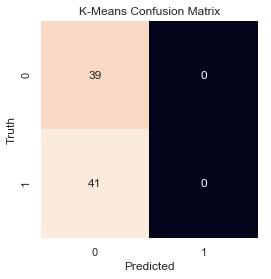

In [24]:
# Plot Confusion Matrix
mat = confusion_matrix(y_test, kmeans_pred)
names = np.unique(y)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.title('K-Means Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### DBSCAN

In [25]:
# Instantiate the learning model
dbscan = DBSCAN(eps=0.5)

# Fit and predict the response
dbscan_fit_pred = dbscan.fit_predict(X_test)

# Confusion matrix and quantitative metrics
print("The confusion matrix is: " + np.str(confusion_matrix(y_test, dbscan_fit_pred)))
print("The accuracy score is: " + np.str(accuracy_score(y_test, dbscan_fit_pred)))

The confusion matrix is: [[39  0]
 [41  0]]
The accuracy score is: 0.4875


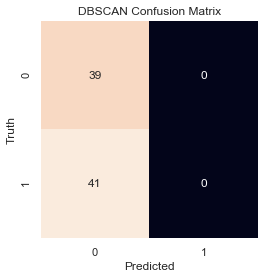

In [26]:
# Plot Confusion Matrix
mat = confusion_matrix(y_test, dbscan_fit_pred)
names = np.unique(y_test)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.title('DBSCAN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### GaussianNB

In [27]:
# Instantiate the learning model
gaussian_naive_bayes = GaussianNB()

# Fit the model
gaussian_naive_bayes.fit(X_train, y_train)

# Predict the response
gaussian_naive_bayes_pred = gaussian_naive_bayes.predict(X_test)

# Confusion matrix and quantitative metrics
print("The confusion matrix is: " + np.str(confusion_matrix(y_test, gaussian_naive_bayes_pred)))
print("The accuracy score is: " + np.str(accuracy_score(y_test, gaussian_naive_bayes_pred)))

The confusion matrix is: [[32  7]
 [21 20]]
The accuracy score is: 0.65


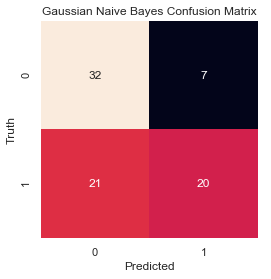

In [28]:
# Plot Confusion Matrix
mat = confusion_matrix(y_test, gaussian_naive_bayes_pred)
names = np.unique(gaussian_naive_bayes_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### 2. Compare the performance of the three classifiers using accuracy score and confusion matrix. Which classifier is better? Why?

- The Gaussian Naive Bayes classifier gives the best results based on accuracy score and confusion matrix.
  - The accuracy score was 0.65 or 65%.
  - The confusion matrix shows that there are a fair amount of True Positives (20), a few False Positives (7), a fair amount of False Negatives (21), and a large number of True Negatives (32).

- The Gaussian Naive Bayes classifier is better than K-Means and DBSCAN because the former is meant for classification, whereas the latter two are meant for clustering.
  - DBSCAN does not have a predict() function, only fit() and fit_predict() functions. There is no way to fit a model using training data and then predict a response using testing data. For DBSCAN, all feature data was passed into the fit_predict() function and the result compared to the target data.

### 3. Compare two cluster results using Adjusted Rand Index, Homogeneity, Completeness, V-measure, and Silhouette Coefficient.

In [29]:
kmeans_adjusted_rand_index = adjusted_rand_score(y_test, kmeans_pred)
print("The Adjusted Rand Index for K-Means is: " + np.str(kmeans_adjusted_rand_index))
kmeans_homogeneity = homogeneity_score(y_test, kmeans_pred)
print("The Homogeneity for K-Means is: " + np.str(kmeans_homogeneity))
kmeans_completeness = completeness_score(y_test, kmeans_pred)
print("The Completeness for K-Means is: " + np.str(kmeans_completeness))
kmeans_vmeasure = v_measure_score(y_test, kmeans_pred)
print("The V-measure for K-Means is: " + np.str(kmeans_vmeasure))
kmeans_silhouette = silhouette_score(X_test, y_test, metric='euclidean')
print("The Silhouette Coefficient for K-Means is: " + np.str(kmeans_silhouette))

The Adjusted Rand Index for K-Means is: 0.0
The Homogeneity for K-Means is: -1.2819486182805385e-15
The Completeness for K-Means is: 1.0
The V-measure for K-Means is: -2.5638972365610806e-15
The Silhouette Coefficient for K-Means is: 0.034525790810896614


In [30]:
dbscan_adjusted_rand_index = adjusted_rand_score(y_test, dbscan_fit_pred)
print("The Adjusted Rand Index for DBSCAN is: " + np.str(dbscan_adjusted_rand_index))
dbscan_homogeneity = homogeneity_score(y_test, dbscan_fit_pred)
print("The Homogeneity for DBSCAN is: " + np.str(dbscan_homogeneity))
dbscan_completeness = completeness_score(y_test, dbscan_fit_pred)
print("The Completeness for DBSCAN is: " + np.str(dbscan_completeness))
dbscan_vmeasure = v_measure_score(y_test, dbscan_fit_pred)
print("The V-measure for DBSCAN is: " + np.str(dbscan_vmeasure))
dbscan_silhouette = silhouette_score(X_test, y_test, metric='euclidean')
print("The Silhouette Coefficient for DBSCAN is: " + np.str(dbscan_silhouette))

The Adjusted Rand Index for DBSCAN is: 0.0
The Homogeneity for DBSCAN is: -1.2819486182805385e-15
The Completeness for DBSCAN is: 1.0
The V-measure for DBSCAN is: -2.5638972365610806e-15
The Silhouette Coefficient for DBSCAN is: 0.034525790810896614


The results of Adjusted Rand Index, Homogeneity, Completeness, V-measure, and Silhouette Coefficient are the same for clustering using K-Means and DBSCAN.

### 4. The movie dataset has a lot of features. Use PCA to reduce the dataset to 30 independent variables. Repeat 1-3 on the reduced dataset.
- #### a. How do the result compare using the reduced dataset?
- #### b. How much of the variation of the original dataset is in the new 30 dimensions?

In [31]:
pca = PCA(n_components=30)
X_pca = np.array(pca.fit_transform(X))
y_pca = np.copy(y)

#### PCA 1. Using scikit-learn split the movie data into a training and test set. Create three different models from the training set to classify movies as action or romance using K-Means, DBSCAN and GaussianNB.

In [32]:
# Split the samples into two subsets, use one for training and the other for testing
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.33, random_state=42)

#### K-Means PCA

In [33]:
# Instantiate the learning model
kmeans = KMeans(n_clusters=2, random_state=21)

# Fit the model
kmeans.fit(X_train_pca, y_train_pca)

# Predict the response
kmeans_pred = kmeans.predict(X_test_pca)

# Confusion matrix and accuracy
print("The confusion matrix is: " + np.str(confusion_matrix(y_test_pca, kmeans_pred)))
print("The accuracy score is: " + np.str(accuracy_score(y_test_pca, kmeans_pred)))

The confusion matrix is: [[39  0]
 [41  0]]
The accuracy score is: 0.4875


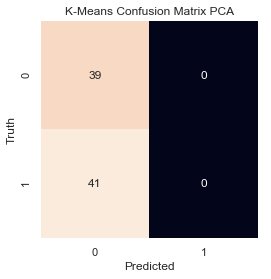

In [34]:
# Plot Confusion Matrix
mat = confusion_matrix(y_test_pca, kmeans_pred)
names = np.unique(y_pca)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.title('K-Means Confusion Matrix PCA')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### DBSCAN PCA

In [35]:
# Instantiate the learning model
dbscan = DBSCAN(eps=0.5)

# Fit and predict the response
dbscan_fit_pred = dbscan.fit_predict(X_test_pca)

# Confusion matrix and quantitative metrics
print("The confusion matrix is: " + np.str(confusion_matrix(y_test_pca, dbscan_fit_pred)))
print("The accuracy score is: " + np.str(accuracy_score(y_test_pca, dbscan_fit_pred)))

The confusion matrix is: [[39  0]
 [41  0]]
The accuracy score is: 0.4875


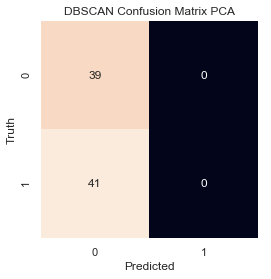

In [36]:
# Plot Confusion Matrix
mat = confusion_matrix(y_test_pca, dbscan_fit_pred)
names = np.unique(y_test_pca)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.title('DBSCAN Confusion Matrix PCA')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### Gaussian Naive Bayes PCA

In [37]:
# Instantiate the learning model
gaussian_naive_bayes = GaussianNB()

# Fit the model
gaussian_naive_bayes.fit(X_train_pca, y_train_pca)

# Predict the response
gaussian_naive_bayes_pred = gaussian_naive_bayes.predict(X_test_pca)

# Confusion matrix and quantitative metrics
print("The confusion matrix is: " + np.str(confusion_matrix(y_test_pca, gaussian_naive_bayes_pred)))
print("The accuracy score is: " + np.str(accuracy_score(y_test_pca, gaussian_naive_bayes_pred)))

The confusion matrix is: [[30  9]
 [19 22]]
The accuracy score is: 0.65


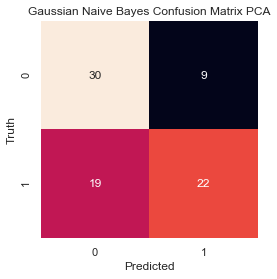

In [38]:
# Plot Confusion Matrix
mat = confusion_matrix(y_test_pca, gaussian_naive_bayes_pred)
names = np.unique(gaussian_naive_bayes_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.title('Gaussian Naive Bayes Confusion Matrix PCA')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### PCA 2. Compare the performance of the three classifiers using accuracy score and confusion matrix. Which classifier is better? Why?
- #### a. How do the result compare using the reduced dataset?
<br>

- Gaussian Naive Bayes is still the best classifier based on accuracy and confusion matrix.
- For K-Means and DBSCAN, the results using the reduced dataset are identical to the non-reduced dataset
- For Gaussian Naive Bayes, the results using the reduced dataset give the same accuracy, but for the confusion matrix:
  - There are more False Positives as well as True Positives
  - There are less True Negatives as well as False Negatives

- Was PCA meant to speed up the computations or should a better result have been expected?

#### PCA 3. Compare two cluster results using Adjusted Rand Index, Homogeneity, Completeness, V-measure, and Silhouette Coefficient.

In [39]:
kmeans_adjusted_rand_index = adjusted_rand_score(y_test_pca, kmeans_pred)
print("The Adjusted Rand Index for K-Means is: " + np.str(kmeans_adjusted_rand_index))
kmeans_homogeneity = homogeneity_score(y_test_pca, kmeans_pred)
print("The Homogeneity for K-Means is: " + np.str(kmeans_homogeneity))
kmeans_completeness = completeness_score(y_test_pca, kmeans_pred)
print("The Completeness for K-Means is: " + np.str(kmeans_completeness))
kmeans_vmeasure = v_measure_score(y_test_pca, kmeans_pred)
print("The V-measure for K-Means is: " + np.str(kmeans_vmeasure))
kmeans_silhouette = silhouette_score(X_test_pca, y_test_pca, metric='euclidean')
print("The Silhouette Coefficient for K-Means is: " + np.str(kmeans_silhouette))

The Adjusted Rand Index for K-Means is: 0.0
The Homogeneity for K-Means is: -1.2819486182805385e-15
The Completeness for K-Means is: 1.0
The V-measure for K-Means is: -2.5638972365610806e-15
The Silhouette Coefficient for K-Means is: 0.053658500394612264


In [40]:
dbscan_adjusted_rand_index = adjusted_rand_score(y_test_pca, dbscan_fit_pred)
print("The Adjusted Rand Index for DBSCAN is: " + np.str(dbscan_adjusted_rand_index))
dbscan_homogeneity = homogeneity_score(y_test_pca, dbscan_fit_pred)
print("The Homogeneity for DBSCAN is: " + np.str(dbscan_homogeneity))
dbscan_completeness = completeness_score(y_test_pca, dbscan_fit_pred)
print("The Completeness for DBSCAN is: " + np.str(dbscan_completeness))
dbscan_vmeasure = v_measure_score(y_test_pca, dbscan_fit_pred)
print("The V-measure for DBSCAN is: " + np.str(dbscan_vmeasure))
dbscan_silhouette = silhouette_score(X_test_pca, y_test_pca, metric='euclidean')
print("The Silhouette Coefficient for DBSCAN is: " + np.str(dbscan_silhouette))

The Adjusted Rand Index for DBSCAN is: 0.0
The Homogeneity for DBSCAN is: -1.2819486182805385e-15
The Completeness for DBSCAN is: 1.0
The V-measure for DBSCAN is: -2.5638972365610806e-15
The Silhouette Coefficient for DBSCAN is: 0.053658500394612264


The results of Adjusted Rand Index, Homogeneity, Completeness, V-measure, and Silhouette Coefficient are the same for clustering using K-Means and DBSCAN.
<br>

Comparing the reduced dataset to the non-reduced dataset, the results of Adjusted Rand Index, Homogeneity, Completeness, V-measure, and Silhouette Coefficient are effectively identical.

In [41]:
print(pca.explained_variance_)

[1.93997860e-04 9.07511446e-05 6.51803808e-05 5.40354323e-05
 4.50622387e-05 3.63641843e-05 3.57944742e-05 2.99537162e-05
 2.80012916e-05 2.47785358e-05 2.24688548e-05 2.05478941e-05
 2.03008849e-05 1.85391562e-05 1.65345310e-05 1.45596762e-05
 1.29987570e-05 1.25733122e-05 1.20926176e-05 1.08238806e-05
 1.02120630e-05 9.60427282e-06 9.47219241e-06 9.26548210e-06
 8.74396530e-06 8.52983856e-06 8.32246738e-06 7.30135793e-06
 6.95763688e-06 6.77179853e-06]


In [ ]:
-3 so the total variance of the 30 is?

#### b. How much of the variation of the original dataset is in the new 30 dimensions?

- See results from above, but not a lot.